<a href="https://colab.research.google.com/github/obeabi/RegressionNN/blob/main/InvestmentEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import time
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
print("libraries installed")

libraries installed


## Which month is the lowest performing month?

In [59]:
ticker = 'SPY'
today = datetime.today().date()
df = yf.download(ticker, interval="1mo", start="1980-12-12" , end=today)

# Remove the last row (incomplete current month)
df = df.iloc[:-1]

# Ensure the data is sorted by date
df = df.sort_index()
# Calculate the MoM returns
df['MoM_Returns'] = df['Adj Close'].pct_change() * 100

df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MoM_Returns
Date,,,,,,,
2024-03-01,508.980011,524.609985,504.910004,523.070007,519.773010,1473246900,2.950327
2024-04-01,523.830017,524.380005,493.859985,501.980011,500.365784,1592974000,-3.733789
2024-05-01,501.380005,533.070007,499.549988,527.369995,525.674133,1153264400,5.057970
2024-06-01,529.020020,550.280029,522.599976,544.219971,542.469910,888923200,3.195093
2024-07-01,545.630005,565.159973,537.450012,550.809998,550.809998,1038465500,1.537429


## Create new faetures and perform the averaging

In [60]:
# Create Month and Year columns
data = df.copy()
data['Month'] = data.index.month_name()
data['Year'] = data.index.year

data.head()

,Open,High,Low,Close,Adj Close,Volume,MoM_Returns,Month,Year
Date,,,,,,,,,
1993-02-01,43.96875,45.12500,42.81250,44.40625,24.947451,5417600,NaN,February,1993
1993-03-01,44.56250,45.84375,44.21875,45.18750,25.386345,3019200,1.759275,March,1993
1993-04-01,45.25000,45.25000,43.28125,44.03125,24.853594,2697200,-2.098573,April,1993
1993-05-01,44.09375,45.65625,43.84375,45.21875,25.523888,1808000,2.696969,May,1993
1993-06-01,45.37500,45.81250,44.21875,45.06250,25.435699,3438000,-0.345512,June,1993


In [61]:
# Group by Month and calculate average and median returns
monthly_avg_returns = data.groupby('Month')['MoM_Returns'].mean().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))
monthly_median_returns = data.groupby('Month')['MoM_Returns'].median().sort_index(key=lambda x: pd.to_datetime(x, format='%B'))

# Calculate the 75th percentile monthly returns
monthly_75th_percentile_returns = data.groupby('Month')['MoM_Returns'].quantile(0.75).sort_index(key=lambda x: pd.to_datetime(x, format='%B'))

# Calculate the 25th percentile monthly returns
monthly_25th_percentile_returns = data.groupby('Month')['MoM_Returns'].quantile(0.25).sort_index(key=lambda x: pd.to_datetime(x, format='%B'))


## Visualize the peformance

<ipython-input-62-0dd1c25187c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=monthly_25th_percentile_returns.index, y=monthly_25th_percentile_returns.values, palette='coolwarm')


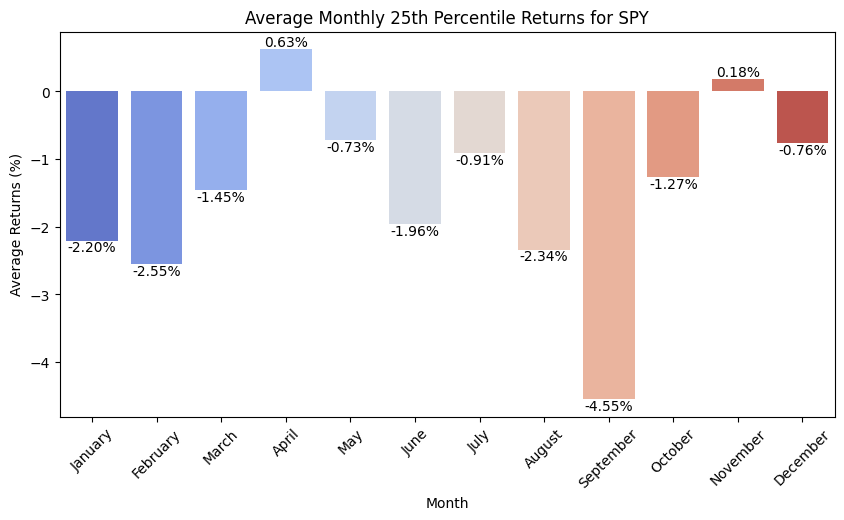

In [62]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=monthly_25th_percentile_returns.index, y=monthly_25th_percentile_returns.values, palette='coolwarm')
#sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
plt.title(f'Average Monthly 25th Percentile Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-63-4d23bfcb01a0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')


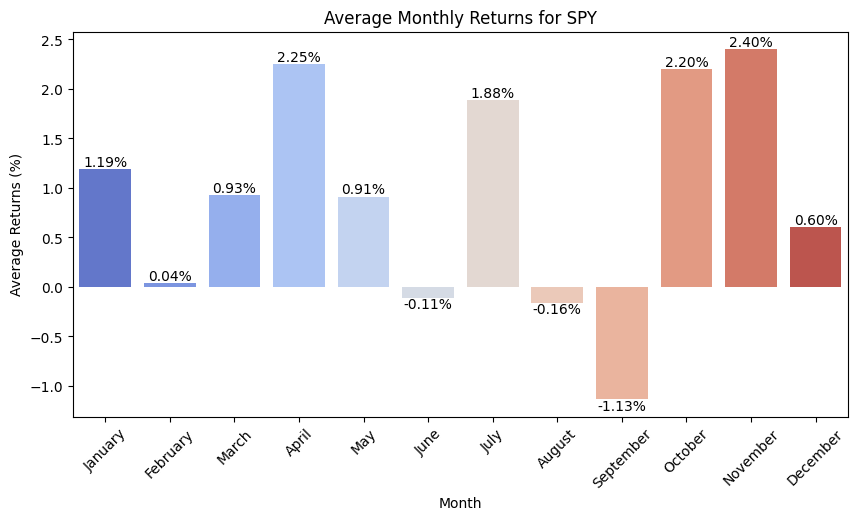

In [63]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
#sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
plt.title(f'Average Monthly Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-64-95e07e06d01a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_median = sns.barplot(x=monthly_median_returns.index, y=monthly_median_returns.values, palette='coolwarm')


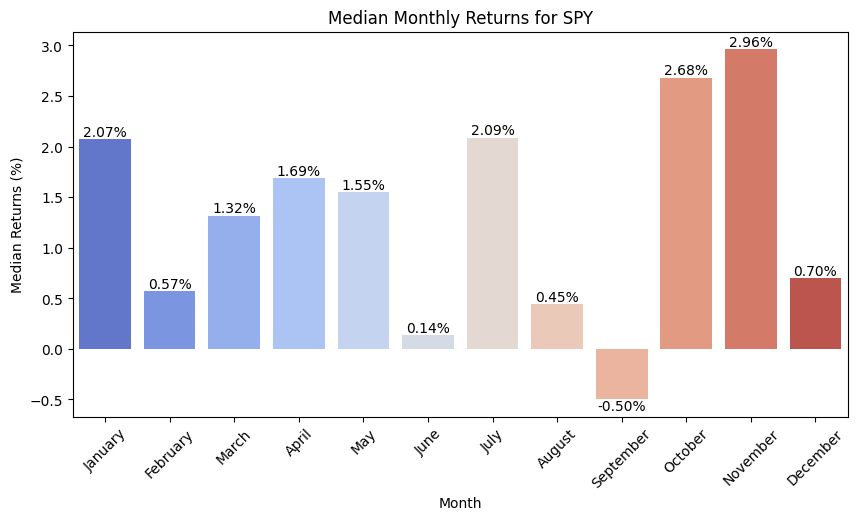

In [64]:
# Plotting median returns with labels
plt.figure(figsize=(10, 5))
ax_median = sns.barplot(x=monthly_median_returns.index, y=monthly_median_returns.values, palette='coolwarm')
plt.title(f'Median Monthly Returns for {ticker}')
plt.ylabel('Median Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_median.containers:
    ax_median.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-65-daa72e636e52>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=monthly_75th_percentile_returns.index, y=monthly_75th_percentile_returns.values, palette='coolwarm')


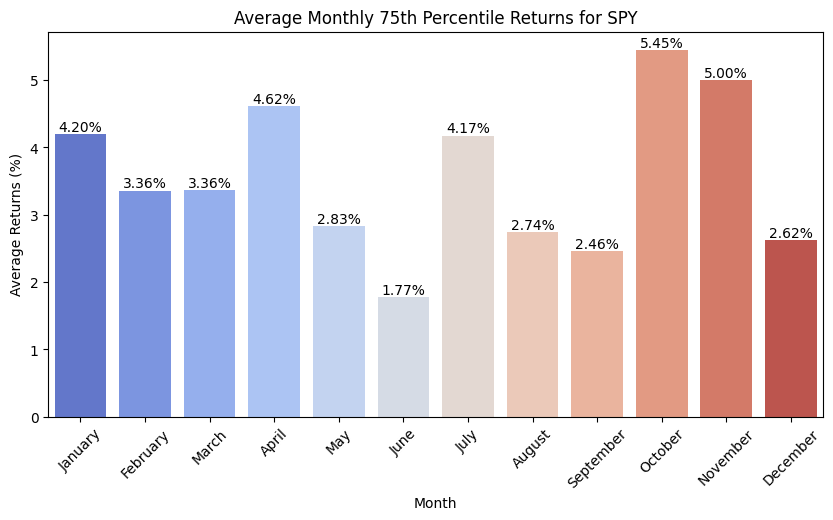

In [65]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=monthly_75th_percentile_returns.index, y=monthly_75th_percentile_returns.values, palette='coolwarm')
#sns.barplot(x=monthly_avg_returns.index, y=monthly_avg_returns.values, palette='coolwarm')
plt.title(f'Average Monthly 75th Percentile Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('Month')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

# To determine if September's performance is statistically significantly different from the other months

In [66]:
# Separate August and September returns
august_returns = data[data['Month'] == 'August']['MoM_Returns'].dropna()
september_returns = data[data['Month'] == 'September']['MoM_Returns'].dropna()

# Calculate the mean returns for all other months excluding August and September
other_months_returns = data[(data['Month'] != 'August') & (data['Month'] != 'September')]['MoM_Returns'].dropna()

# Perform a one-sample t-test for August
t_stat_august, p_value_august = stats.ttest_1samp(august_returns, other_months_returns.mean())

# Perform a one-sample t-test for September
t_stat_september, p_value_september = stats.ttest_1samp(september_returns, other_months_returns.mean())

# Display the results
print(f"August Average Return (Up to 2019): {august_returns.mean():.2f}%")
print(f"Other Months' Average Return (Excluding Aug & Sep) (Up to 2019): {other_months_returns.mean():.2f}%")
print(f"August t-statistic: {t_stat_august:.2f}")
print(f"August p-value: {p_value_august:.4f}")

print("\n")

print(f"September Average Return (Up to 2019): {september_returns.mean():.2f}%")
print(f"September t-statistic: {t_stat_september:.2f}")
print(f"September p-value: {p_value_september:.4f}")

# Check if the p-values are significant at the 0.05 level
if p_value_august < 0.05:
    print("The difference in returns for August is statistically significant.")
else:
    print("The difference in returns for August is not statistically significant.")

if p_value_september < 0.05:
    print("The difference in returns for September is statistically significant.")
else:
    print("The difference in returns for September is not statistically significant.")


August Average Return (Up to 2019): -0.16%
Other Months' Average Return (Excluding Aug & Sep) (Up to 2019): 1.23%
August t-statistic: -1.77
August p-value: 0.0876


September Average Return (Up to 2019): -1.13%
September t-statistic: -2.65
September p-value: 0.0126
The difference in returns for August is not statistically significant.
The difference in returns for September is statistically significant.


August 75th Percentile Return (Up to 2019): 2.74%
September 75th Percentile Return (Up to 2019): 2.46%
Other Months' 75th Percentile Return (Excluding Aug & Sep) (Up to 2019): 3.92%

August t-statistic: -5.20
August p-value: 0.0000

September t-statistic: -5.68
September p-value: 0.0000
The difference in the 75th percentile returns for August is statistically significant.
The difference in the 75th percentile returns for September is statistically significant.


<ipython-input-67-71a6161d689b>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Month', y='75th Percentile Return (%)', data=percentiles, palette='coolwarm')


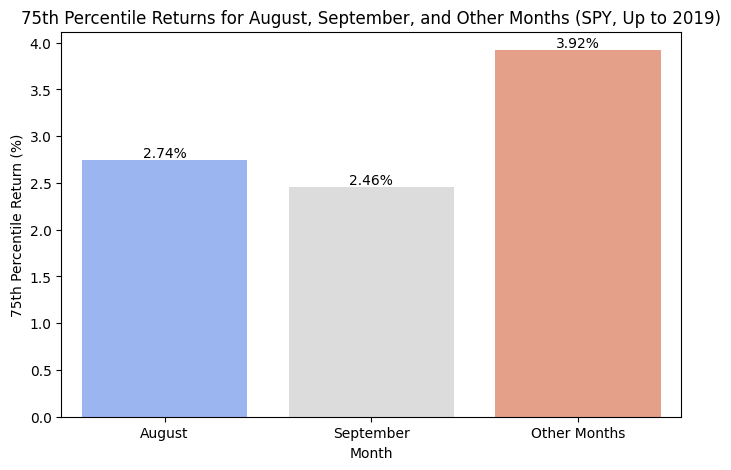

In [67]:
# Separate August and September returns
august_returns = data[data['Month'] == 'August']['MoM_Returns'].dropna()
september_returns = data[data['Month'] == 'September']['MoM_Returns'].dropna()
# Calculate the 75th percentile for August, September, and other months
august_75th = august_returns.quantile(0.75)
september_75th = september_returns.quantile(0.75)
other_months_75th = data[(data['Month'] != 'August') & (data['Month'] != 'September')]['MoM_Returns'].quantile(0.75)

# Perform a one-sample t-test for the 75th percentile
t_stat_august, p_value_august = stats.ttest_1samp(august_returns, other_months_75th)
t_stat_september, p_value_september = stats.ttest_1samp(september_returns, other_months_75th)

# Display the results
print(f"August 75th Percentile Return (Up to 2019): {august_75th:.2f}%")
print(f"September 75th Percentile Return (Up to 2019): {september_75th:.2f}%")
print(f"Other Months' 75th Percentile Return (Excluding Aug & Sep) (Up to 2019): {other_months_75th:.2f}%")

print(f"\nAugust t-statistic: {t_stat_august:.2f}")
print(f"August p-value: {p_value_august:.4f}")

print(f"\nSeptember t-statistic: {t_stat_september:.2f}")
print(f"September p-value: {p_value_september:.4f}")

# Check if the p-values are significant at the 0.05 level
if p_value_august < 0.05:
    print("The difference in the 75th percentile returns for August is statistically significant.")
else:
    print("The difference in the 75th percentile returns for August is not statistically significant.")

if p_value_september < 0.05:
    print("The difference in the 75th percentile returns for September is statistically significant.")
else:
    print("The difference in the 75th percentile returns for September is not statistically significant.")

# Plotting the 75th percentile returns
percentiles = pd.DataFrame({
    'Month': ['August', 'September', 'Other Months'],
    '75th Percentile Return (%)': [august_75th, september_75th, other_months_75th]
})

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Month', y='75th Percentile Return (%)', data=percentiles, palette='coolwarm')

# Adding labels on the bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f%%')

plt.title(f'75th Percentile Returns for August, September, and Other Months ({ticker}, Up to 2019)')
plt.ylabel('75th Percentile Return (%)')
plt.show()


## What day of the week performs worse on average in September and August?

In [68]:
ticker = 'SPY'
today = datetime.today().date()
#previous_26days = today - timedelta(days=100)
#start_of_week = today - timedelta(days=today.weekday())
#start_of_current_month = today.replace(day=1)
#end_of_previous_month = start_of_current_month - timedelta(days=1)
# Calculate the start of the previous month
#start_of_previous_month = end_of_previous_month.replace(day=1)
# Calculate the start of the previous week
#start_of_previous_week = start_of_week - timedelta(weeks=1)
# Calculate the start of the next week to include the current week's data
#start_of_next_week = start_of_week + timedelta(weeks=1)
#df = yf.download(ticker, interval="1wk", start=start_of_previous_week, end=start_of_next_week )
#df = yf.download(ticker, start=previous_26days, end=today + timedelta(days=1))
df = yf.download(ticker, start="1980-12-12" , end=today)


# Ensure the data is sorted by date
df = df.sort_index()
# Calculate the MoM returns
df['daily_Returns'] = df['Adj Close'].pct_change() * 100

df.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,daily_Returns
Date,,,,,,,
2024-08-13,536.530029,542.280029,536.280029,542.039978,542.039978,52333100,1.644562
2024-08-14,542.849976,544.960022,540.119995,543.750000,543.750000,42446900,0.315479
2024-08-15,549.500000,553.359985,548.880005,553.070007,553.070007,60846800,1.714024
2024-08-16,551.419983,555.020020,551.260010,554.309998,554.309998,44430700,0.224201
2024-08-19,554.729980,559.609985,553.859985,559.609985,559.609985,39121800,0.956141


## Create new faetures and perform the averaging

In [69]:
# Create Month and Year columns
data = df.copy()
data['Month'] = data.index.month_name()
data['Year'] = data.index.year
data['day_name'] = data.index.day_name()
#data = data[(data['Month']=="August") | (data['Month']=="September") ]
data.head()

,Open,High,Low,Close,Adj Close,Volume,daily_Returns,Month,Year,day_name
Date,,,,,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.684109,1003200,NaN,January,1993,Friday
1993-02-01,43.96875,44.25000,43.96875,44.25000,24.859676,480500,0.711258,February,1993,Monday
1993-02-02,44.21875,44.37500,44.12500,44.34375,24.912350,201300,0.211883,February,1993,Tuesday
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.175684,529400,1.057043,February,1993,Wednesday
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.281006,531500,0.418348,February,1993,Thursday


In [70]:
# Create a custom order for the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
# Group by day_name and calculate average and median returns
daily_avg_returns = data.groupby('day_name')['daily_Returns'].mean().reindex(day_order)
daily_median_returns = data.groupby('day_name')['daily_Returns'].median().reindex(day_order)

# Calculate the 75th percentile daily returns
daily_75th_percentile_returns = data.groupby('day_name')['daily_Returns'].quantile(0.75).reindex(day_order)

# Calculate the 25th percentile daily returns
daily_25th_percentile_returns = data.groupby('day_name')['daily_Returns'].quantile(0.25).reindex(day_order)

## Visualize the peformance

<ipython-input-71-4d67f9789bff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=daily_25th_percentile_returns.index, y=daily_25th_percentile_returns.values, palette='coolwarm')


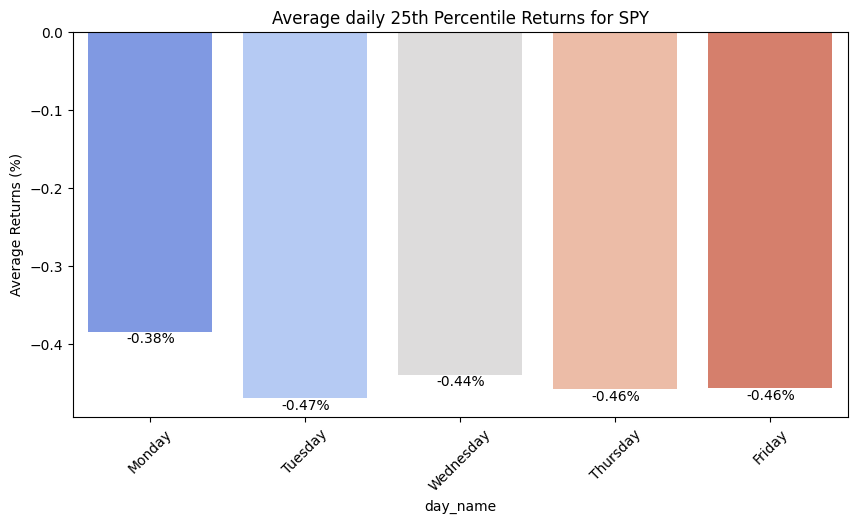

In [71]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=daily_25th_percentile_returns.index, y=daily_25th_percentile_returns.values, palette='coolwarm')
plt.title(f'Average daily 25th Percentile Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('day_name')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-72-b411c7781466>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=daily_avg_returns.index, y=daily_avg_returns.values, palette='coolwarm')


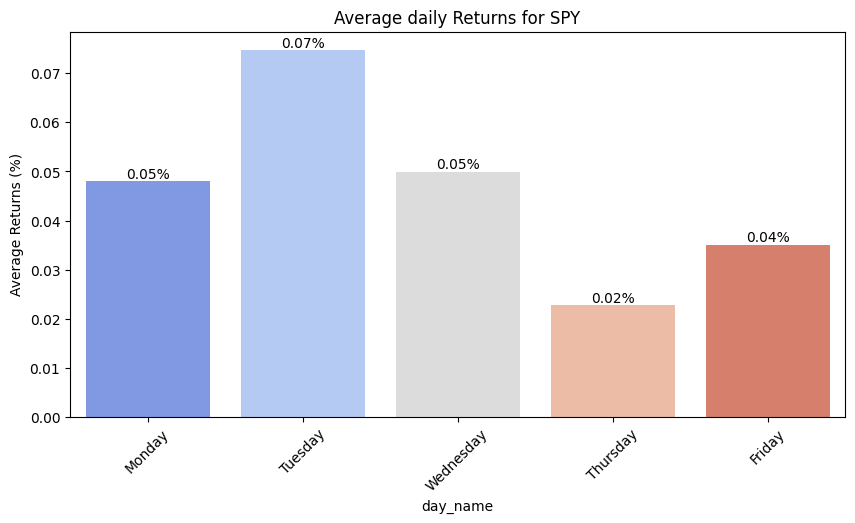

In [72]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=daily_avg_returns.index, y=daily_avg_returns.values, palette='coolwarm')
plt.title(f'Average daily Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('day_name')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-73-4629b0bc0d8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_median = sns.barplot(x=daily_median_returns.index, y=daily_median_returns.values, palette='coolwarm')


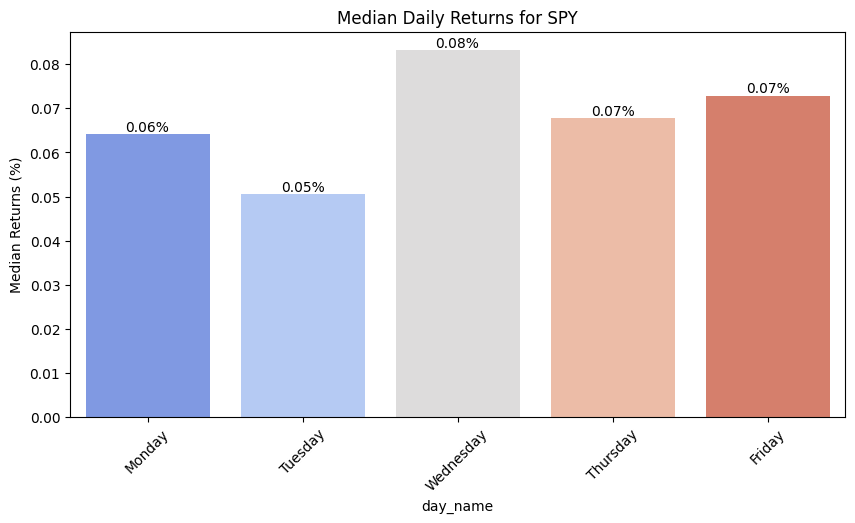

In [73]:
# Plotting median returns with labels
plt.figure(figsize=(10, 5))
ax_median = sns.barplot(x=daily_median_returns.index, y=daily_median_returns.values, palette='coolwarm')
plt.title(f'Median Daily Returns for {ticker}')
plt.ylabel('Median Returns (%)')
plt.xlabel('day_name')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_median.containers:
    ax_median.bar_label(i, fmt='%.2f%%')

plt.show()

<ipython-input-74-594b36f502c4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_avg = sns.barplot(x=daily_75th_percentile_returns.index, y=daily_75th_percentile_returns.values, palette='coolwarm')


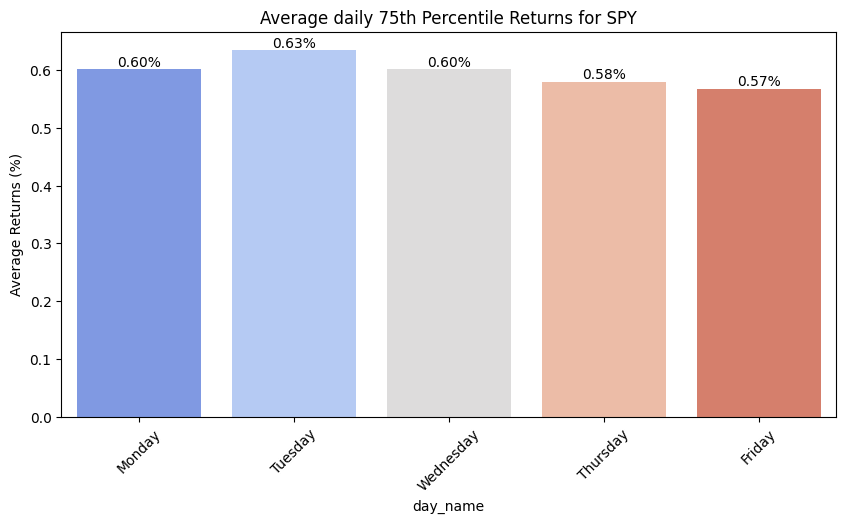

In [74]:
# Plotting average returns
plt.figure(figsize=(10, 5))
ax_avg = sns.barplot(x=daily_75th_percentile_returns.index, y=daily_75th_percentile_returns.values, palette='coolwarm')
plt.title(f'Average daily 75th Percentile Returns for {ticker}')
plt.ylabel('Average Returns (%)')
plt.xlabel('day_name')
plt.xticks(rotation=45)

# Adding labels on the bars
for i in ax_avg.containers:
    ax_avg.bar_label(i, fmt='%.2f%%')

plt.show()

## To determine if Thursday and Tuesday's performance in the months of August and September's is statistically significantly different from the other days of week

In [75]:
# Separate August and September returns
tuesday_returns = data[data['day_name'] == 'Tuesday']['daily_Returns'].dropna()
thursday_returns = data[data['day_name'] == 'Thursday']['daily_Returns'].dropna()

# Calculate the mean returns for all other days excluding Tuesday and Thursday
other_days_returns = data[(data['day_name'] != 'Tuesday') & (data['day_name'] != 'Thursday')]['daily_Returns'].dropna()

# Perform a one-sample t-test for Tuesday
t_stat_tuesday, p_value_tuesday = stats.ttest_1samp(tuesday_returns, other_days_returns.mean())

# Perform a one-sample t-test for Thursday
t_stat_thursday, p_value_thursday = stats.ttest_1samp(thursday_returns, other_days_returns.mean())

# Display the results
print(f"Tuesday Average Return (Up to 2019): {tuesday_returns.mean():.2f}%")
print(f"Other days' Average Return (Excluding Tuesday & Thursday) (Up to 2019): {other_months_returns.mean():.2f}%")
print(f"Tuesday t-statistic: {t_stat_tuesday:.2f}")
print(f"Tuesday p-value: {p_value_tuesday:.4f}")

print("\n")

print(f"Thursday Average Return (Up to 2019): {thursday_returns.mean():.2f}%")
print(f"Thursday t-statistic: {t_stat_thursday:.2f}")
print(f"Thursday p-value: {p_value_thursday:.4f}")

# Check if the p-values are significant at the 0.05 level
if p_value_tuesday < 0.05:
    print("The difference in returns for Tuesday is statistically significant.")
else:
    print("The difference in returns for Tuesday is not statistically significant.")

if p_value_thursday < 0.05:
    print("The difference in returns for Thursday is statistically significant.")
else:
    print("The difference in returns for Thursday is not statistically significant.")


Tuesday Average Return (Up to 2019): 0.07%
Other days' Average Return (Excluding Tuesday & Thursday) (Up to 2019): 1.23%
Tuesday t-statistic: 1.04
Tuesday p-value: 0.2982


Thursday Average Return (Up to 2019): 0.02%
Thursday t-statistic: -0.73
Thursday p-value: 0.4634
The difference in returns for Tuesday is not statistically significant.
The difference in returns for Thursday is not statistically significant.
